In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)


In [3]:
project002 = pd.read_csv("wEEk_5_prOjEct_cOrrElAtEd.csv")
project002


,country,year,deprivation_percentage,house_deprivation_percentage,poverty_risk_percentage,risk_after_social_transfer_percentage,employment_rate,income_inequality_ratio,work_poverty_risk_percentage,early_leavers_percentage,bottom_40_income_share,inability_make_ends_meet_percentage,mean_income,median_income,death_rate,homicide_rate_per_100k
0,AT,2015,2.9,4.3,16.9,13.9,74.3,4.12,7.9,7.3,23.1,5.3,24531,21981,0.57,0.49
1,AT,2016,3.3,4.2,17.2,14.1,74.8,4.19,8.3,6.9,23.0,4.3,25368,23071,0.50,0.56
2,AT,2017,3.4,4.4,17.1,14.4,75.4,4.44,7.7,7.4,22.7,4.5,26076,23361,0.54,0.70
3,AT,2018,2.8,3.2,16.8,14.3,76.2,4.10,8.0,7.3,23.2,4.5,25627,23204,0.57,0.83
4,AT,2019,2.7,3.0,16.5,13.3,76.8,4.20,7.6,7.8,22.9,4.0,26300,23687,0.51,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,SK,2016,7.6,4.3,17.1,12.7,71.8,3.90,6.5,7.4,24.5,10.1,11129,10466,0.74,1.11
157,SK,2017,6.3,5.2,15.8,12.4,73.2,3.72,6.3,9.3,25.0,8.1,10017,9605,0.48,1.47
158,SK,2018,5.4,3.7,15.2,12.2,74.5,3.18,6.0,8.6,26.2,8.4,10277,9744,0.58,1.23
159,SK,2019,5.9,3.6,14.8,11.9,75.6,3.52,4.4,8.3,25.1,9.4,11026,10503,0.58,1.39


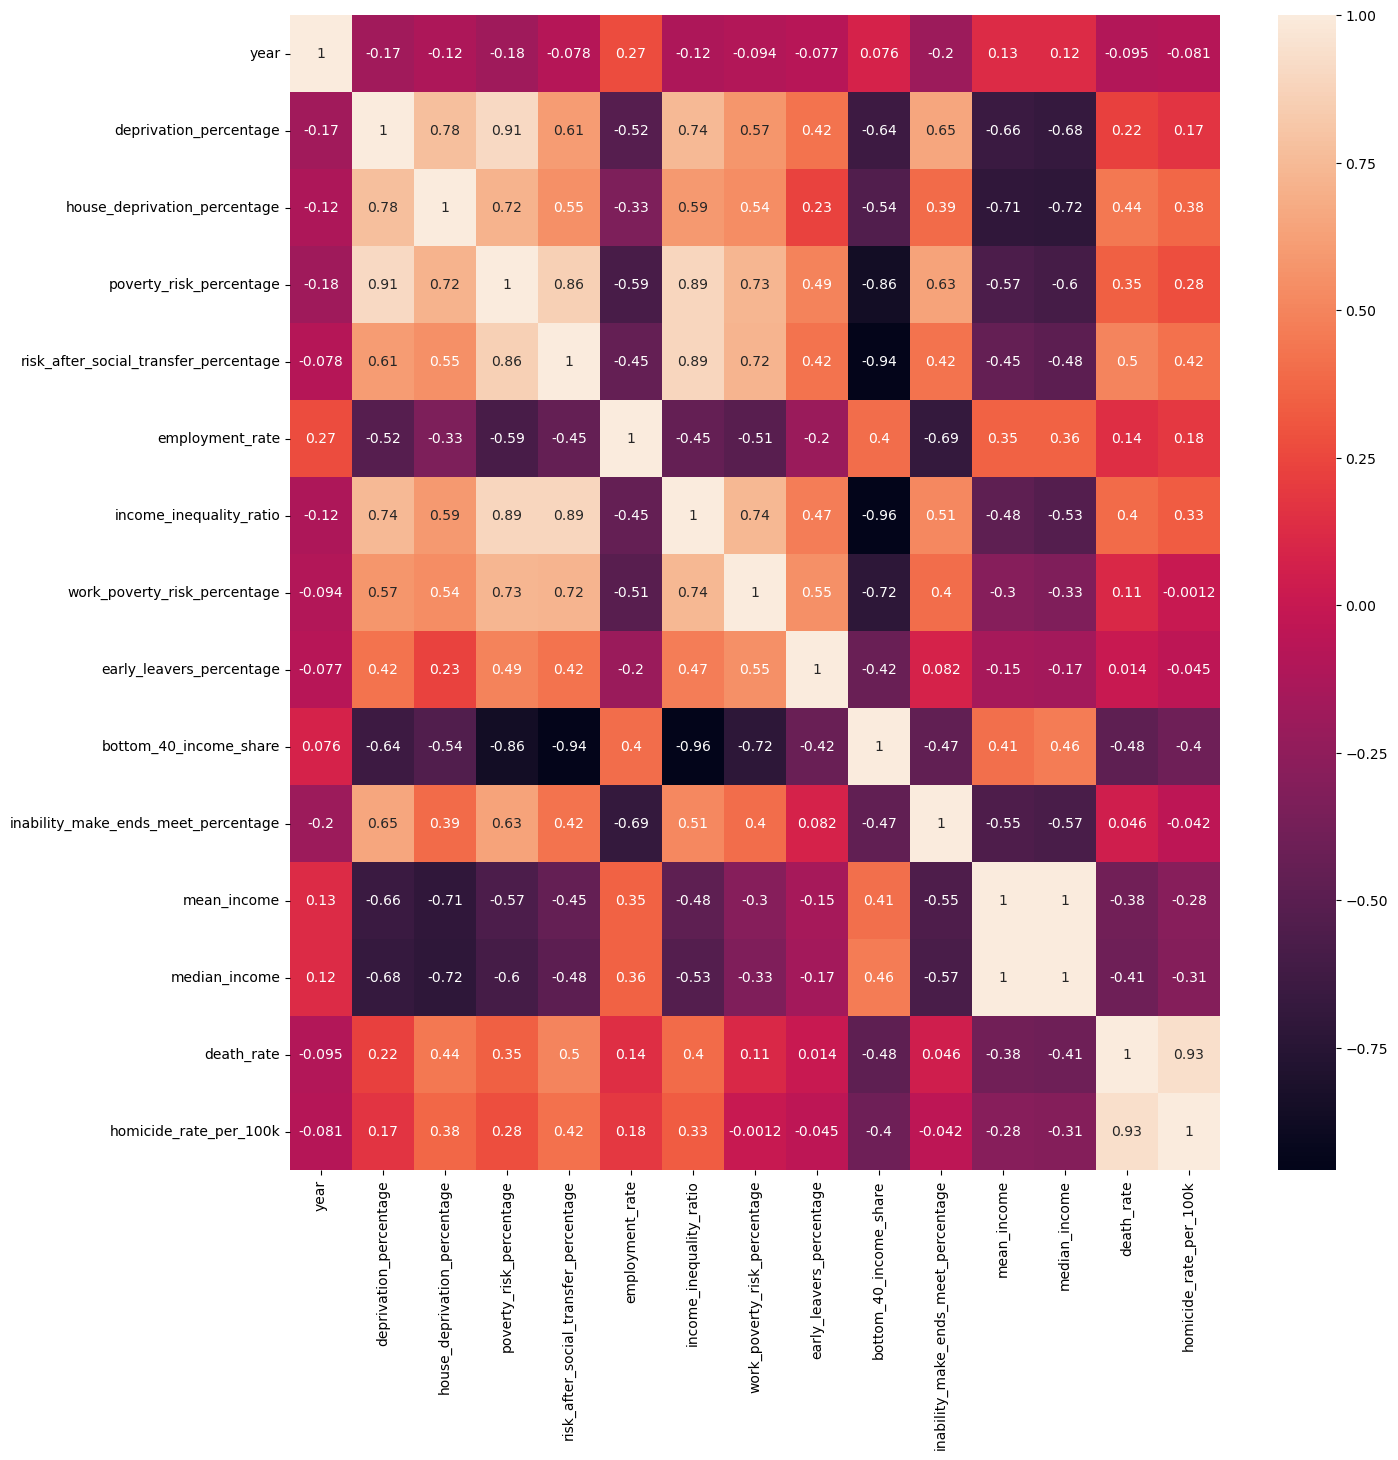

In [4]:
corr_matrix=project002.select_dtypes("number").corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [6]:
X = project002.drop("income_inequality_ratio", axis=1)
y = project002["income_inequality_ratio"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [7]:
from sklearn.preprocessing import MinMaxScaler
X_train_num = X_train.select_dtypes(include = np.number)
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm


,year,deprivation_percentage,house_deprivation_percentage,poverty_risk_percentage,risk_after_social_transfer_percentage,employment_rate,work_poverty_risk_percentage,early_leavers_percentage,bottom_40_income_share,inability_make_ends_meet_percentage,mean_income,median_income,death_rate,homicide_rate_per_100k
0,0.6,0.041551,0.020725,0.147826,0.179012,0.759259,0.024691,0.350318,0.775510,0.022959,0.614012,0.623916,0.214429,0.257827
1,0.2,0.000000,0.113990,0.179710,0.438272,0.955556,0.246914,0.292994,0.632653,0.043367,0.628435,0.660844,0.158317,0.139963
2,0.8,0.182825,0.093264,0.211594,0.277778,0.648148,0.290123,0.343949,0.642857,0.058673,0.664760,0.641138,0.116232,0.147330
3,0.2,0.110803,0.072539,0.240580,0.456790,0.844444,0.419753,0.477707,0.540816,0.022959,0.668321,0.668865,0.062124,0.108656
4,0.4,0.091413,0.145078,0.342029,0.734568,0.903704,0.407407,0.573248,0.326531,0.058673,0.318371,0.313098,0.426854,0.346225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.8,0.041551,0.176166,0.063768,0.179012,0.781481,0.111111,0.114650,0.867347,0.068878,0.457380,0.484874,0.052104,0.064457
124,0.4,0.379501,0.393782,0.530435,0.851852,0.785185,0.358025,0.165605,0.081633,0.145408,0.244317,0.207443,0.539078,0.672192
125,0.8,0.592798,0.435233,0.628986,0.833333,0.722222,0.382716,0.707006,0.000000,0.568878,0.205078,0.148487,0.164329,0.151013
126,0.4,0.177285,0.310881,0.353623,0.672840,0.325926,0.191358,0.019108,0.448980,0.359694,0.184110,0.192175,0.212425,0.145488


In [15]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=13, solver="saga", multi_class="multinomial").fit(X_train_norm, y_train)


ValueError: Unknown label type: 'continuous'